<a href="https://www.kaggle.com/code/muichimon/rsna-intracranialaneurysm-eda?scriptVersionId=273656058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **00 - Set Up**

In [4]:
%pip install celluloid --q

Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib notebook
    
from pathlib import Path
import nibabel as nib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from celluloid import Camera
from IPython.display import HTML

import seaborn as sns
from matplotlib import colors
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
%matplotlib inline

# **01 - EDA**

In [6]:
df_train = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv')
df_train_local = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv')

## **train.csv contents**

In [7]:
print(df_train.shape)
df_train.head()

(4348, 18)


,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df_train["Aneurysm Present"].value_counts())

Aneurysm Present
0    2485
1    1863
Name: count, dtype: int64


In [9]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SeriesInstanceUID                           4348 non-null   object
 1   PatientAge                                  4348 non-null   int64 
 2   PatientSex                                  4348 non-null   object
 3   Modality                                    4348 non-null   object
 4   Left Infraclinoid Internal Carotid Artery   4348 non-null   int64 
 5   Right Infraclinoid Internal Carotid Artery  4348 non-null   int64 
 6   Left Supraclinoid Internal Carotid Artery   4348 non-null   int64 
 7   Right Supraclinoid Internal Carotid Artery  4348 non-null   int64 
 8   Left Middle Cerebral Artery                 4348 non-null   int64 
 9   Right Middle Cerebral Artery                4348 non-null   int64 
 10  Anterior Communicating A

In [10]:
df_train.describe()

,PatientAge,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,58.466881,0.017939,0.022539,0.075897,0.063937,0.050368,0.067617,0.083487,0.010580,0.012879,0.019779,0.023229,0.025299,0.025989,0.428473
std,15.841231,0.132746,0.148446,0.264864,0.244670,0.218728,0.251117,0.276648,0.102323,0.112768,0.139257,0.150648,0.157050,0.159121,0.494914
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_train.columns

Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present'],
      dtype='object')

## **eda plots**

In [12]:
features_num = ['PatientAge']

features_cat = ['PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation']

target = 'Aneurysm Present'

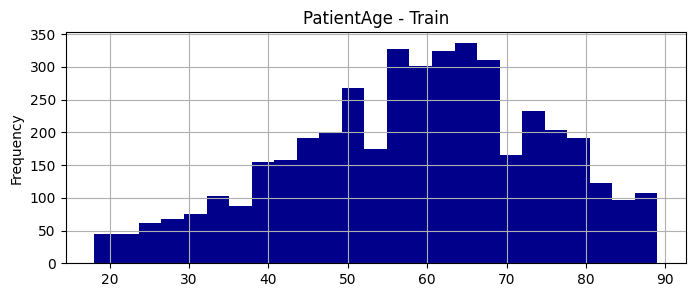

In [13]:
# plot histograms
for f in features_num:
    plt.figure(figsize=(8,3))
    df_train[f].plot(kind='hist', bins=25, color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()

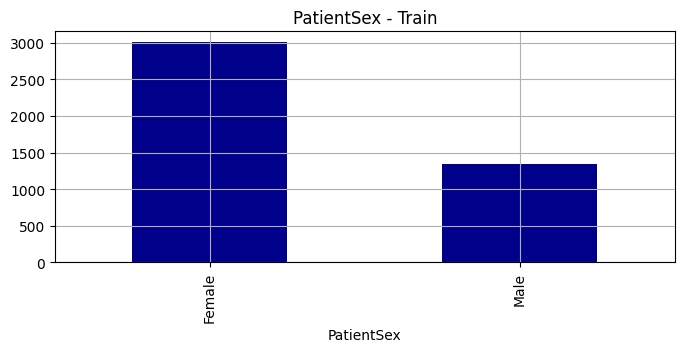

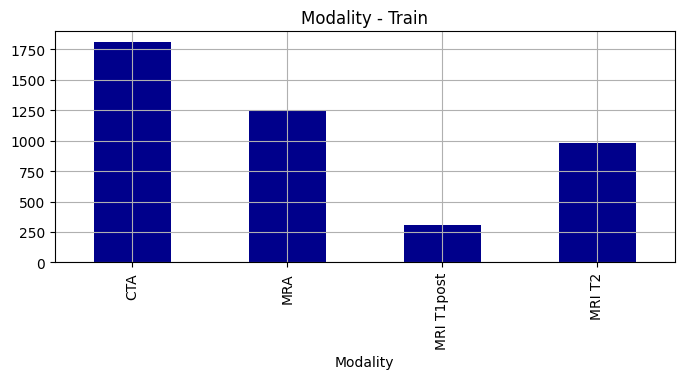

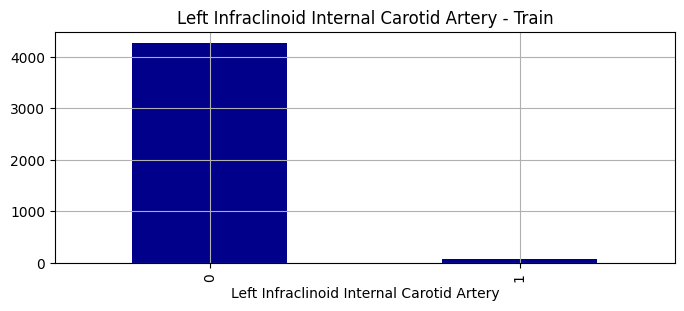

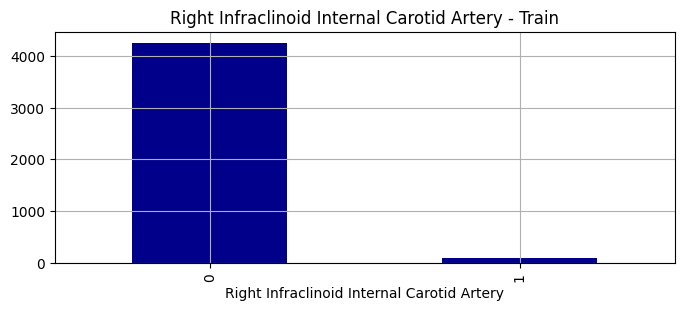

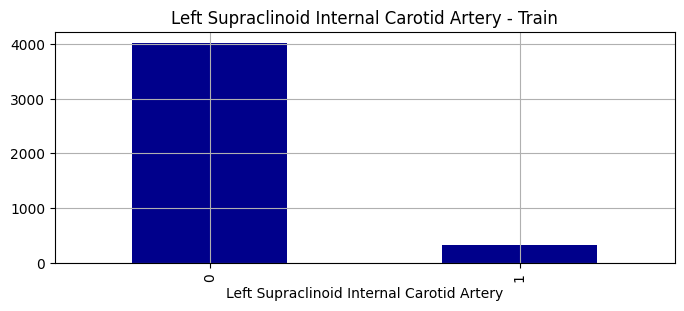

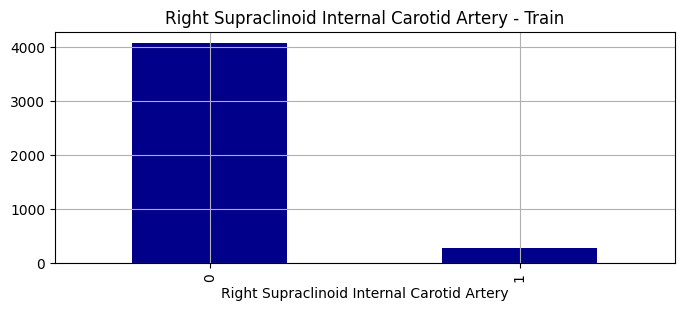

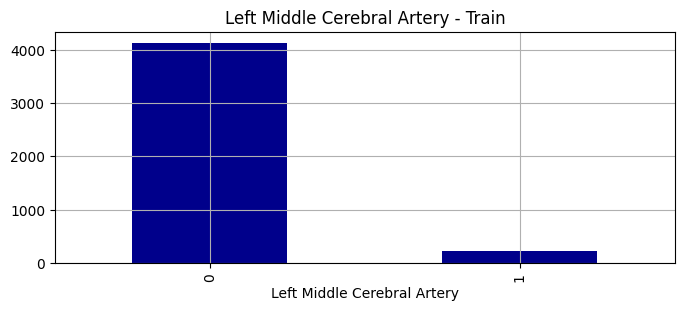

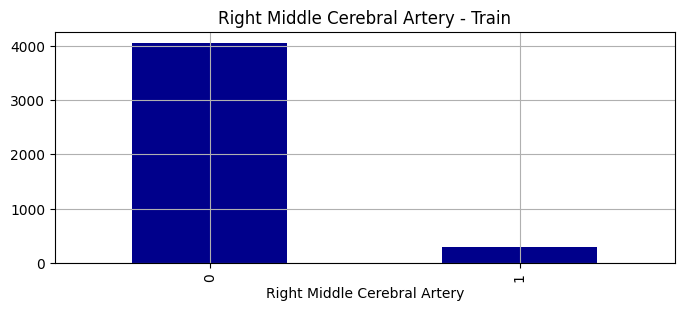

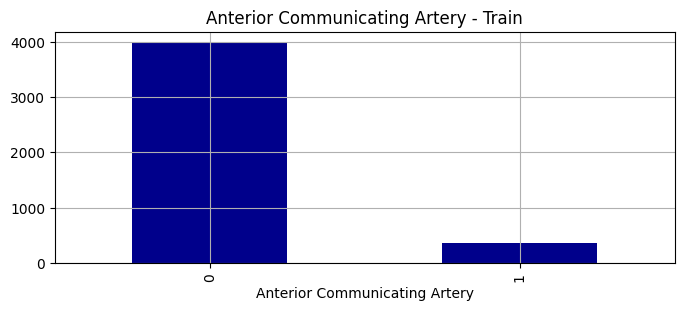

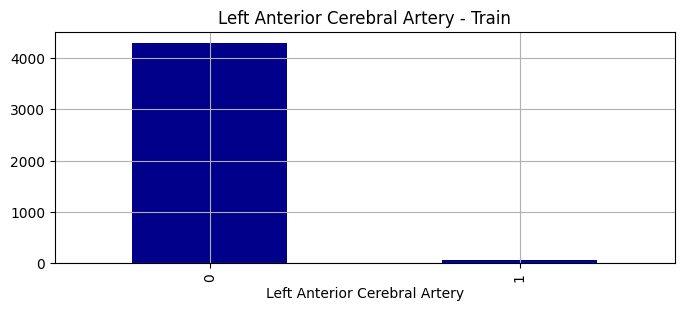

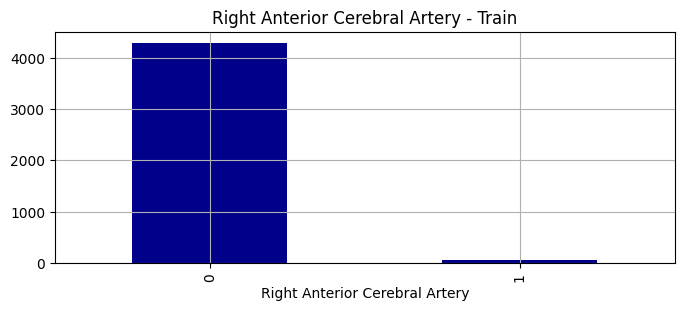

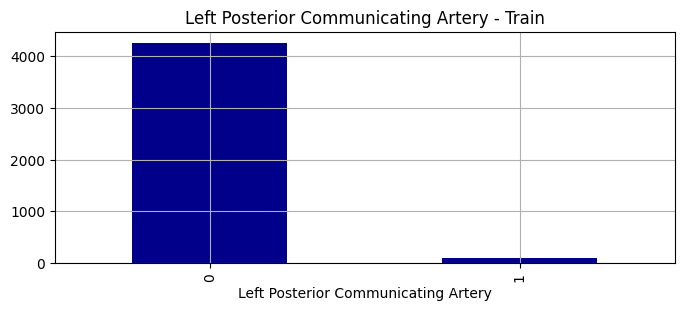

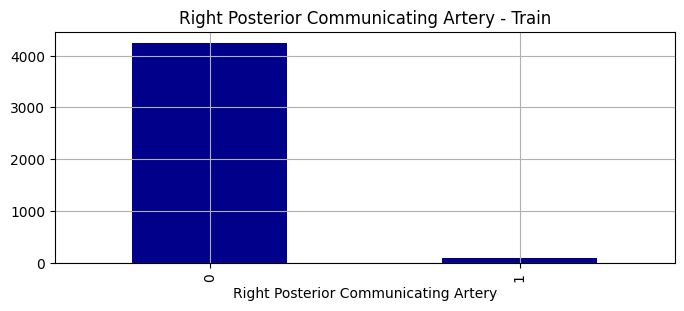

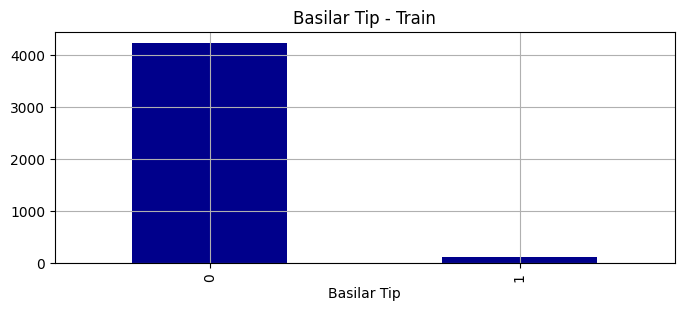

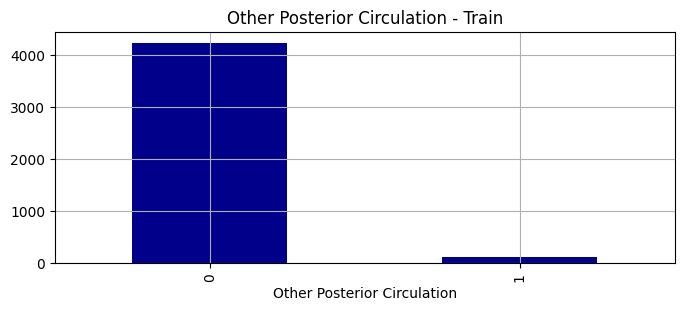

In [14]:
# plot categorical feature distributions
for f in features_cat:
    plt.figure(figsize=(8,3))
    df_train[f].value_counts().sort_index().plot(kind='bar', color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()

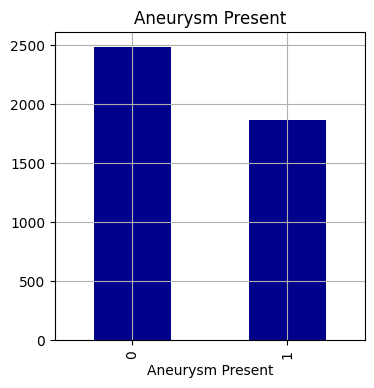

In [15]:
plt.figure(figsize=(4,4))
df_train[target].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title(target)
plt.grid()
plt.show()

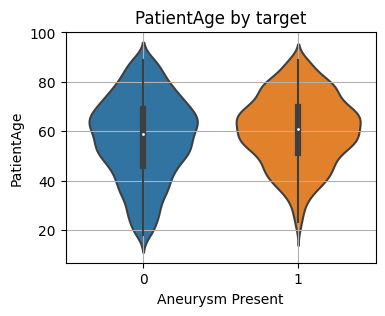

In [16]:
# plot features distributions split by target
for f in features_num:
    plt.figure(figsize=(4,3))
    sns.violinplot(df_train, x=target, y=f,)
    plt.title(f + ' by target')
    plt.grid()
    plt.show()

>>> Feature: PatientSex


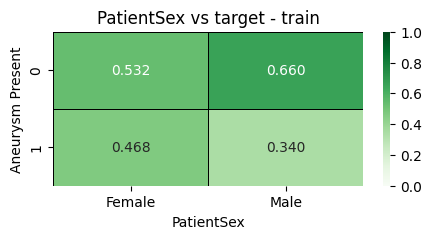

>>> Feature: Modality


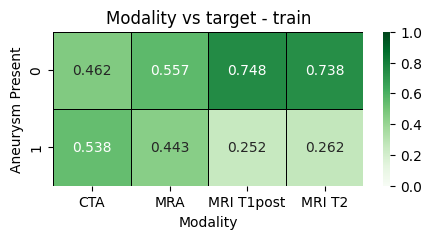

>>> Feature: Left Infraclinoid Internal Carotid Artery


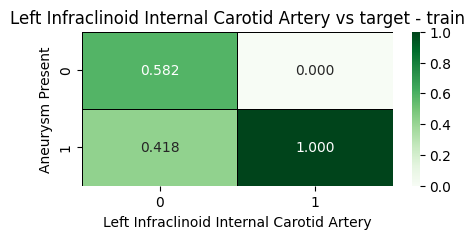

>>> Feature: Right Infraclinoid Internal Carotid Artery


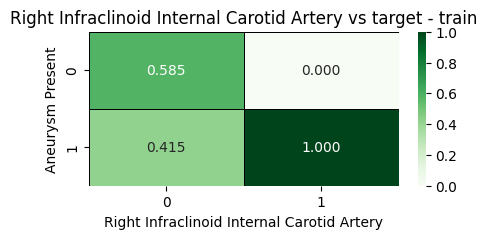

>>> Feature: Left Supraclinoid Internal Carotid Artery


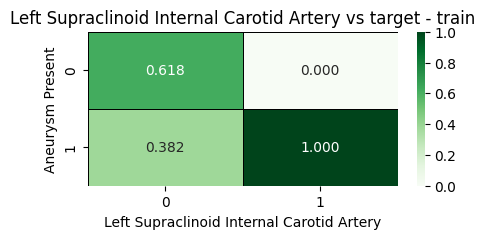

>>> Feature: Right Supraclinoid Internal Carotid Artery


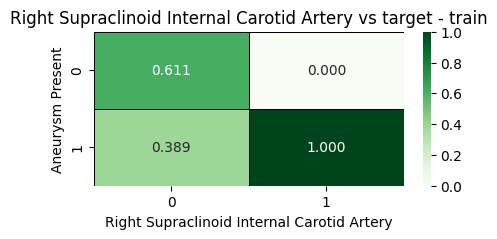

>>> Feature: Left Middle Cerebral Artery


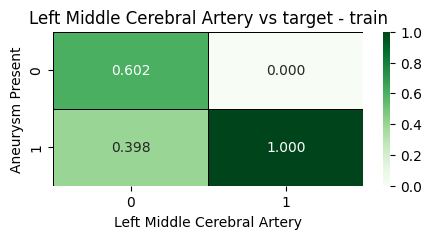

>>> Feature: Right Middle Cerebral Artery


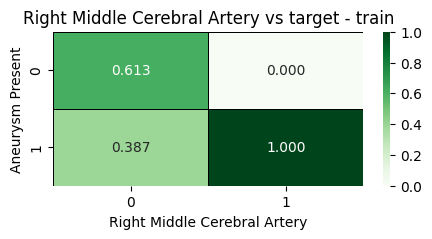

>>> Feature: Anterior Communicating Artery


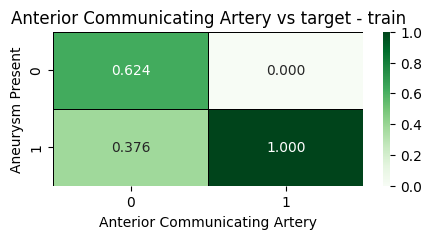

>>> Feature: Left Anterior Cerebral Artery


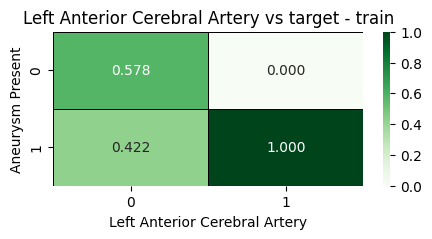

>>> Feature: Right Anterior Cerebral Artery


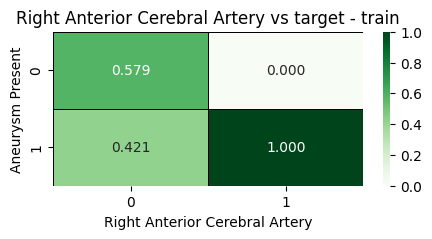

>>> Feature: Left Posterior Communicating Artery


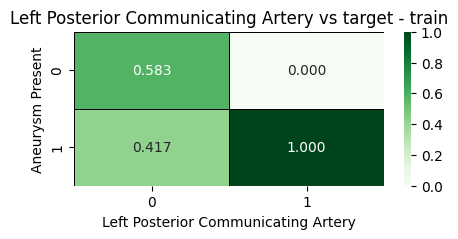

>>> Feature: Right Posterior Communicating Artery


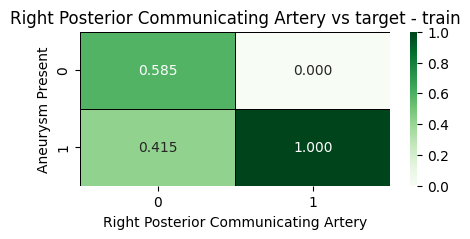

>>> Feature: Basilar Tip


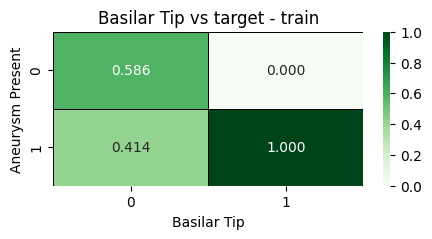

>>> Feature: Other Posterior Circulation


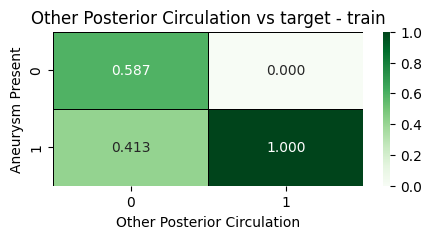

In [17]:
# impact of categorical features - normalized cross tables
for f in features_cat:
    print('>>> Feature:', f)
    ctab = pd.crosstab(df_train[target], df_train[f])
    ctab_norm = ctab / ctab.sum()
    plt.figure(figsize=(5,2))
    g = sns.heatmap(ctab_norm, annot=True,
                    fmt='.3f', linecolor='black',
                    linewidths=0.5, cmap='Greens', 
                    vmin=0, vmax=+1)
    plt.title(f + ' vs target - train')
    plt.show()

# **02 - Segmentation Visualization**

Shape: (512, 512, 228)
Unique labels: [ 0  1  2  5  6  7  8  9 10 11 12 13]


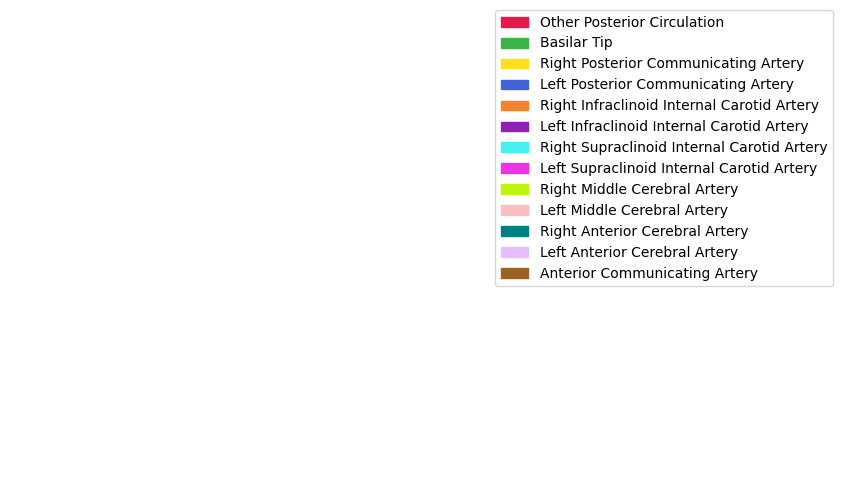

In [18]:
img = nib.load("/kaggle/input/rsna-intracranial-aneurysm-detection/segmentations/1.2.826.0.1.3680043.8.498.10035643165968342618460849823699311381.nii")
data = img.get_fdata()

labels = nib.load("/kaggle/input/rsna-intracranial-aneurysm-detection/segmentations/1.2.826.0.1.3680043.8.498.10035643165968342618460849823699311381_cowseg.nii")
mask = labels.get_fdata().astype(int)

print("Shape:", data.shape)
print("Unique labels:", np.unique(mask))

# Define colors: label 0 transparent, labels 1-13 distinct
distinct_colors = [(0,0,0,0), "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4",
                   "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324"]
cmap = colors.ListedColormap(distinct_colors)
norm = colors.BoundaryNorm(boundaries=np.arange(-0.5, len(distinct_colors)+0.5, 1), ncolors=len(distinct_colors))

# Label names
label_names = {
    1: "Other Posterior Circulation",
    2: "Basilar Tip",
    3: "Right Posterior Communicating Artery",
    4: "Left Posterior Communicating Artery",
    5: "Right Infraclinoid Internal Carotid Artery",
    6: "Left Infraclinoid Internal Carotid Artery",
    7: "Right Supraclinoid Internal Carotid Artery",
    8: "Left Supraclinoid Internal Carotid Artery",
    9: "Right Middle Cerebral Artery",
    10: "Left Middle Cerebral Artery",
    11: "Right Anterior Cerebral Artery",
    12: "Left Anterior Cerebral Artery",
    13: "Anterior Communicating Artery"
}

# Animation
fig = plt.figure(figsize=(6, 6))
camera = Camera(fig)

for i in range(data.shape[2]):
    plt.imshow(np.rot90(data[:, :, i]), cmap="gray")
    plt.imshow(np.rot90(mask[:, :, i]), cmap=cmap, alpha=0.7, norm=norm)
    plt.axis('off')
    camera.snap()

animation = camera.animate(interval=50)

# Create legend for labels 1-13 (skip background 0)
legend_patches = [Patch(color=distinct_colors[i], label=label_names[i]) for i in label_names.keys()]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

HTML(animation.to_html5_video())

# **03 - Modality ImageShape Distribution**

In [19]:
%pip install torchio --q

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pydicom

import torch
import torchio as tio

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [21]:
labels = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")

In [22]:
root_path = Path("/kaggle/input/rsna-intracranial-aneurysm-detection/series/")
patient_dirs = sorted([p for p in root_path.iterdir() if p.is_dir()])

In [23]:
def get_aneurysm_present_for_patient(patient_dir: Path, labels_df: pd.DataFrame):
    """
    Given a patient directory Path (SeriesInstanceUID) and the labels DataFrame,
    return the Aneurysm Present value (0 or 1).
    """
    # Extract SeriesInstanceUID from folder name
    series_uid = patient_dir.name
    
    # Filter DataFrame
    result = labels_df.loc[labels_df["SeriesInstanceUID"] == series_uid, "Aneurysm Present"]
    
    if not result.empty:
        return int(result.values[0])
    else:
        # UID not found
        return None
        

def get_modality_for_patient(patient_dir: Path, labels_df: pd.DataFrame):
    """
    Given a patient directory Path (SeriesInstanceUID) and the labels DataFrame,
    return the Modality value (e.g., 'CT', 'MR', etc.).
    """
    # Extract SeriesInstanceUID from folder name
    series_uid = patient_dir.name
    
    # Filter DataFrame
    result = labels_df.loc[labels_df["SeriesInstanceUID"] == series_uid, "Modality"]
    
    if not result.empty:
        return result.values[0]
    else:
        # UID not found
        return None

In [24]:
class AneurysmSubjectDataset(Dataset):
    """
    Loads full 3D volumes (stacked 2D slices) per patient, along with
    the aneurysm label and modality information.

    Args:
        patient_dirs (list[Path]): list of SeriesInstanceUID directories
        labels_df (pd.DataFrame): dataframe with labels
        train (bool): whether to use train split or validation split
        test_size (float): fraction of data to use as validation
        transform: optional transform function (applied to 3D volume)
        random_state (int): random seed for train/validation split
    """
    def __init__(self, patient_dirs, labels_df, train=True, test_size=0.2, transform=None, random_state=42):
        self.labels_df = labels_df
        self.transform = transform

        # Split into train and validation sets
        train_dirs, val_dirs = train_test_split(
            patient_dirs, test_size=test_size, random_state=random_state, shuffle=True
        )
        self.patient_dirs = train_dirs if train else val_dirs

    def __len__(self):
        return len(self.patient_dirs)

    def __getitem__(self, idx):
        patient_dir = self.patient_dirs[idx]

        # --- Load DICOM slices ---
        dicom_files = list(patient_dir.glob("*.dcm"))
        dicoms = [pydicom.dcmread(f) for f in dicom_files]
        dicoms.sort(key=lambda dcm: int(dcm.InstanceNumber))

        slices = [dcm.pixel_array for dcm in dicoms]

        # Stack into 3D volume: [H, W, D]
        volume = np.stack(slices, axis=-1)  # [H, W, D]
        volume = torch.from_numpy(volume).unsqueeze(0).float()  # [1, H, W, D]
    
        if self.transform:
            import torchio as tio
            subject = tio.Subject(image=tio.ScalarImage(tensor=volume))
            subject = self.transform(subject)
            volume = subject.image.data  # Extract transformed tensor

        # --- Labels and Metadata ---
        label = get_aneurysm_present_for_patient(patient_dir, self.labels_df)
        modality = get_modality_for_patient(patient_dir, self.labels_df)

        label = torch.tensor(label, dtype=torch.long)
        modality = str(modality)  # keep as string, not tensor

        return {
            "image": volume,
            "label": label,
            "modality": modality,
        }

In [25]:
train_dataset = AneurysmSubjectDataset(
    patient_dirs=patient_dirs,
    labels_df=labels,
    train=True,
    test_size=0.5  
)

val_dataset = AneurysmSubjectDataset(
    patient_dirs=patient_dirs,
    labels_df=labels,
    train=False,
    test_size=0.5
)

In [27]:
sample = train_dataset[1]
img = sample["image"]
label = sample["label"]
modal = sample["modality"]

print("Modality:", modal)
print("Img Shape:", img.shape)

Modality: CTA
Img Shape: torch.Size([1, 512, 512, 200])


In [ ]:
from collections import defaultdict
import statistics as stats
from tqdm import tqdm  # optional but nice for long loops

shape_stats = defaultdict(list)

# --- Collect shapes per modality ---
for i in tqdm(range(len(train_dataset)), desc="Analyzing dataset"):
    sample = train_dataset[i]
    img = sample["image"]
    modality = sample["modality"]

    # store shape as tuple (C, H, W, D)
    shape_stats[modality].append(tuple(img.shape))

# --- Summarize ---
for modality, shapes in shape_stats.items():
    print(f"\nModality: {modality}")
    print(f"  Number of samples: {len(shapes)}")

    unique_shapes = set(shapes)
    if len(unique_shapes) == 1:
        print(f"  All shapes: {list(unique_shapes)[0]}")
    else:
        Hs = [s[1] for s in shapes]
        Ws = [s[2] for s in shapes]
        Ds = [s[3] for s in shapes]

        print(f"  Unique shapes: {len(unique_shapes)} distinct shapes")

        print(f"  Height range: {min(Hs)} - {max(Hs)}")
        print(f"  Width range:  {min(Ws)} - {max(Ws)}")
        print(f"  Depth range:  {min(Ds)} - {max(Ds)}")

        print(f"  Mean Height: {stats.mean(Hs):.1f}, Median: {stats.median(Hs)}")
        print(f"  Mean Width:  {stats.mean(Ws):.1f}, Median: {stats.median(Ws)}")
        print(f"  Mean Depth:  {stats.mean(Ds):.1f}, Median: {stats.median(Ds)}")

In [ ]:
import random

for modality in shape_stats.keys():
    # find first example of that modality
    for i in range(len(train_dataset)):
        s = train_dataset[i]
        if s["modality"] == modality:
            img = s["image"].squeeze().numpy()
            mid_slice = img[..., img.shape[-1] // 2]
            plt.imshow(mid_slice, cmap='gray')
            plt.title(f"{modality} - shape {tuple(s['image'].shape)}")
            plt.axis('off')
            plt.show()
            break